<a href="https://colab.research.google.com/github/mgarbanzo/GOES16/blob/main/Instrumentos_Meteorol%C3%B3gicos_Sat%C3%A9lite_GOES_R_ABI_L2_SUVI_B%C3%A1sico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from netCDF4 import Dataset
import pylab as plt

# DMW

In [3]:
!wget https://noaa-goes16.s3.amazonaws.com/ABI-L2-DMWF/2021/193/18/OR_ABI-L2-DMWF-M6C14_G16_s20211931800224_e20211931809532_c20211931822498.nc

--2021-07-13 16:22:47--  https://noaa-goes16.s3.amazonaws.com/ABI-L2-DMWF/2021/193/18/OR_ABI-L2-DMWF-M6C14_G16_s20211931800224_e20211931809532_c20211931822498.nc
Resolving noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com)... 52.216.105.59
Connecting to noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com)|52.216.105.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6274407 (6.0M) [binary/octet-stream]
Saving to: ‘OR_ABI-L2-DMWF-M6C14_G16_s20211931800224_e20211931809532_c20211931822498.nc.1’

OR_ABI-L2-DMWF-M6C1 100%[===================>]   5.98M  29.6MB/s    in 0.2s    

2021-07-13 16:22:47 (29.6 MB/s) - ‘OR_ABI-L2-DMWF-M6C14_G16_s20211931800224_e20211931809532_c20211931822498.nc.1’ saved [6274407/6274407]



In [4]:
archivo = Dataset("/content/OR_ABI-L2-DMWF-M6C14_G16_s20211931800224_e20211931809532_c20211931822498.nc")

In [7]:
archivo

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    naming_authority: gov.nesdis.noaa
    Conventions: CF-1.7
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    standard_name_vocabulary: CF Standard Name Table (v35, 20 July 2016)
    institution: DOC/NOAA/NESDIS > U.S. Department of Commerce, National Oceanic and Atmospheric Administration, National Environmental Satellite, Data, and Information Services
    project: GOES
    production_site: NSOF
    production_environment: OE
    orbital_slot: GOES-East
    platform_ID: G16
    instrument_type: GOES R Series Advanced Baseline Imager
    scene_id: Full Disk
    instrument_ID: FM1
    featureType: point
    iso_series_metadata_id: aee58cd0-f85a-11e1-a21f-0800200c9a66
    title: ABI L2 Derived Motion Winds
    summary: The Derived Motion Winds product consists of wind vectors containing wind speed, wind direction, pressure, and brightness temperature.  The product is generated by tracking 

In [5]:
archivo.dimensions

{'atmospheric_layer': <class 'netCDF4._netCDF4.Dimension'>: name = 'atmospheric_layer', size = 3,
 'dmw_band': <class 'netCDF4._netCDF4.Dimension'>: name = 'dmw_band', size = 1,
 'nMeasures': <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'nMeasures', size = 121940,
 'number_atmospheric_layer_bounds': <class 'netCDF4._netCDF4.Dimension'>: name = 'number_atmospheric_layer_bounds', size = 2,
 'number_of_LZA_bounds': <class 'netCDF4._netCDF4.Dimension'>: name = 'number_of_LZA_bounds', size = 2,
 'number_of_SZA_bounds': <class 'netCDF4._netCDF4.Dimension'>: name = 'number_of_SZA_bounds', size = 2,
 'number_of_image_bounds': <class 'netCDF4._netCDF4.Dimension'>: name = 'number_of_image_bounds', size = 2,
 'number_of_time_bounds': <class 'netCDF4._netCDF4.Dimension'>: name = 'number_of_time_bounds', size = 2}

In [6]:
archivo.variables

{'DQF': <class 'netCDF4._netCDF4.Variable'>
 int8 DQF(nMeasures)
     _FillValue: -1
     long_name: ABI L2+ Derived Motion Winds data quality flags
     standard_name: status_flag
     _Unsigned: true
     valid_range: [ 0 22]
     units: 1
     coordinates: retrieval_local_zenith_angle solar_zenith_angle band_id band_wavelength time pressure lat lon
     cell_methods: retrieval_local_zenith_angle: point solar_zenith_angle: point time: point area: point
     flag_values: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
     flag_meanings: good_wind_qf invalid_due_to_max_gradient_below_threshold_qf invalid_due_to_location_on_earth_limb_qf invalid_due_to_cloud_amount_below_or_exceeds_threshold_qf invalid_due_to_median_pressure_retrieval_failure_qf invalid_due_to_bad_or_missing_brightness_temp_or_reflectance_qf invalid_due_to_multiple_cloud_layers_qf invalid_due_to_insufficient_structure_for_reliable_tracking_qf invalid_due_to_cloud_tracking_correlation_below_thresh

In [8]:
latitudes = archivo.variables['lat'][:]
longitudes = archivo.variables['lon'][:]

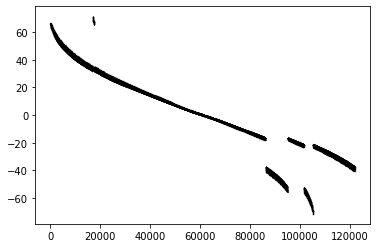

In [17]:
plt.plot(latitudes,'.k',markersize=0.1)

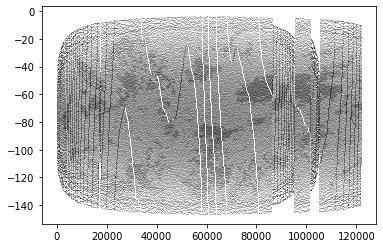

In [16]:
plt.plot(longitudes,'+k',markersize=0.1)

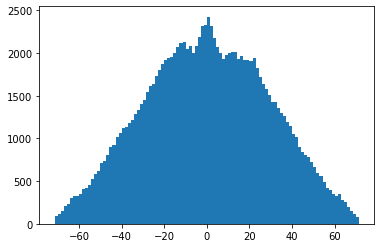

In [18]:
HistLats = plt.hist(latitudes, bins=100)

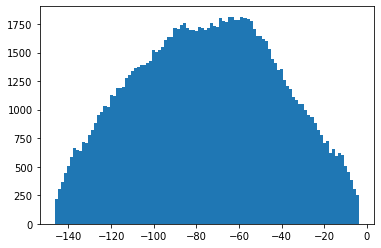

In [19]:
HistLons = plt.hist(longitudes, bins=100)

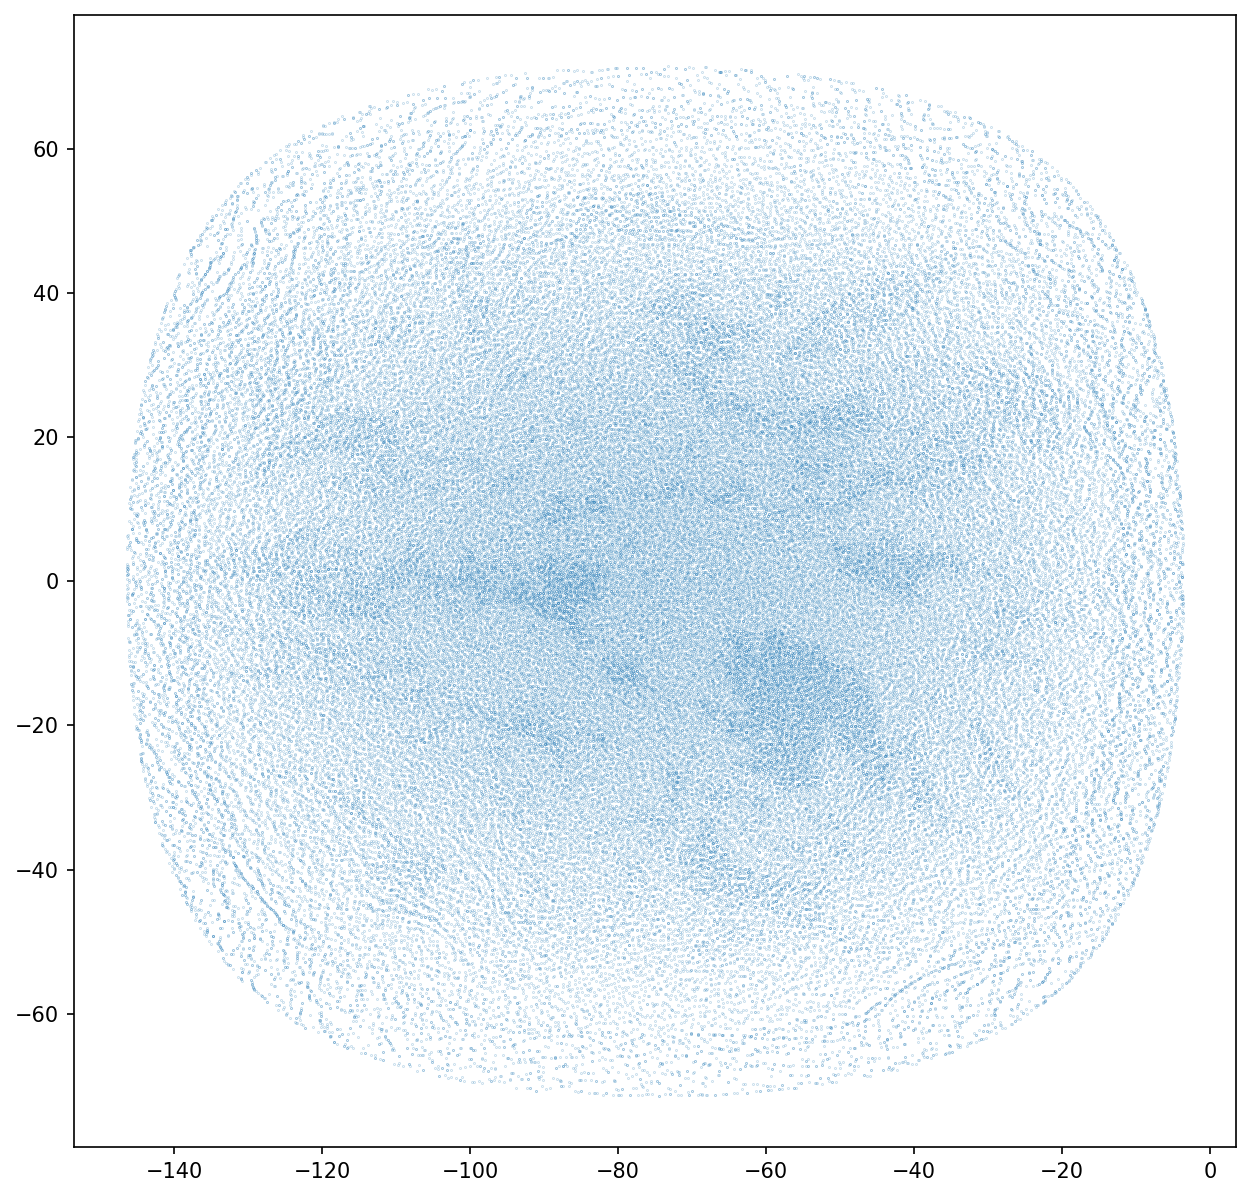

In [60]:
plt.figure(figsize=(10,10),dpi=150)
plt.scatter(longitudes,latitudes, s=0.01 )

# ¿Y el resto de variables?

In [25]:
speed = archivo.variables['wind_speed'][:]
dir = archivo.variables['wind_direction'][:]
pres = archivo.variables['pressure'][:]

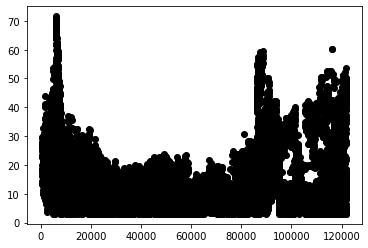

In [26]:
plt.plot(speed,'ok')

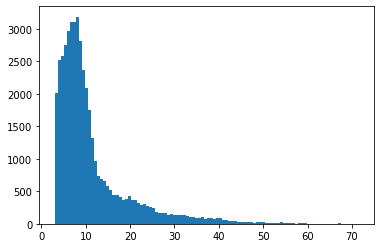

In [27]:
HistSpeed = plt.hist(speed, bins=100)

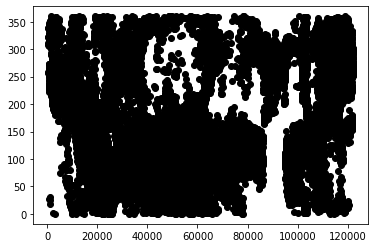

In [28]:
plt.plot(dir,'ok')

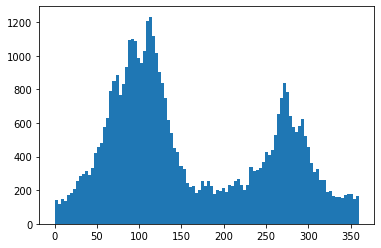

In [29]:
HistDir = plt.hist(dir, bins=100)

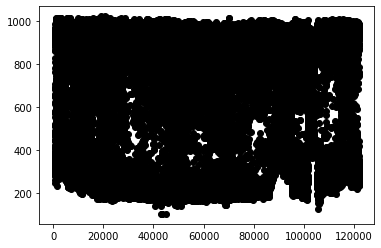

In [31]:
plt.plot(pres,'ok')

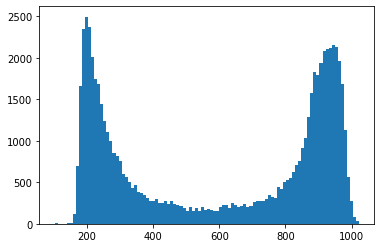

In [32]:
HistPres = plt.hist(pres, bins=100)

# SUVI

In [41]:
!wget https://noaa-goes16.s3.amazonaws.com/SUVI-L1b-Fe284/2021/193/18/OR_SUVI-L1b-Fe284_G16_s20211931801506_e20211931801516_c20211931802099.nc

--2021-07-13 16:35:12--  https://noaa-goes16.s3.amazonaws.com/SUVI-L1b-Fe284/2021/193/18/OR_SUVI-L1b-Fe284_G16_s20211931801506_e20211931801516_c20211931802099.nc
Resolving noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com)... 52.217.76.196
Connecting to noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com)|52.217.76.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4991259 (4.8M) [binary/octet-stream]
Saving to: ‘OR_SUVI-L1b-Fe284_G16_s20211931801506_e20211931801516_c20211931802099.nc’

OR_SUVI-L1b-Fe284_G 100%[===================>]   4.76M  21.3MB/s    in 0.2s    

2021-07-13 16:35:13 (21.3 MB/s) - ‘OR_SUVI-L1b-Fe284_G16_s20211931801506_e20211931801516_c20211931802099.nc’ saved [4991259/4991259]



In [42]:
archivo = Dataset("/content/OR_SUVI-L1b-Fe284_G16_s20211931801506_e20211931801516_c20211931802099.nc")

In [43]:
archivo

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    production_site: WCDAS
    dataset_name: OR_SUVI-L1b-Fe284_G16_s20211931801506_e20211931801516_c20211931802099.nc
    naming_authority: gov.nesdis.noaa
    Conventions: CF-1.7
    institution: DOC/NOAA/NESDIS> U.S. Department of Commerce, National Oceanic and Atmospheric Administration, National Environmental Satellite, Data, and Information Services
    project: GOES
    iso_series_metadata_id: f5816f57-fd6d-11e3-a3ac-0800200c9a66
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    keywords_vocabulary: NASA Global Change Master Directory (GCMD) Earth Science Keywords, Version 7.0.0.0.0
    title: SUVI L1b Solar Imagery: EUV
    summary: SUVI L1b Solar Imagery: EUV Products are images of the sun at six wavelengths and multiple radiance level ranges spanning many orders of magnitude in support of viewing the sun during different types of solar activity. Different combinations of aperture p

In [44]:
archivo.variables['RAD']

<class 'netCDF4._netCDF4.Variable'>
int16 RAD(NAXIS2, NAXIS1)
    _FillValue: -32768
    long_name: SUVI L1b Solar Imagery
    sensor_bit_depth: 16
    valid_range: [-32767  32767]
    scale_factor: 0.00037724106
    add_offset: 7.040285
    units: W m-2 sr-1
unlimited dimensions: 
current shape = (1280, 1280)
filling on

In [45]:
data = archivo.variables['RAD'][:]

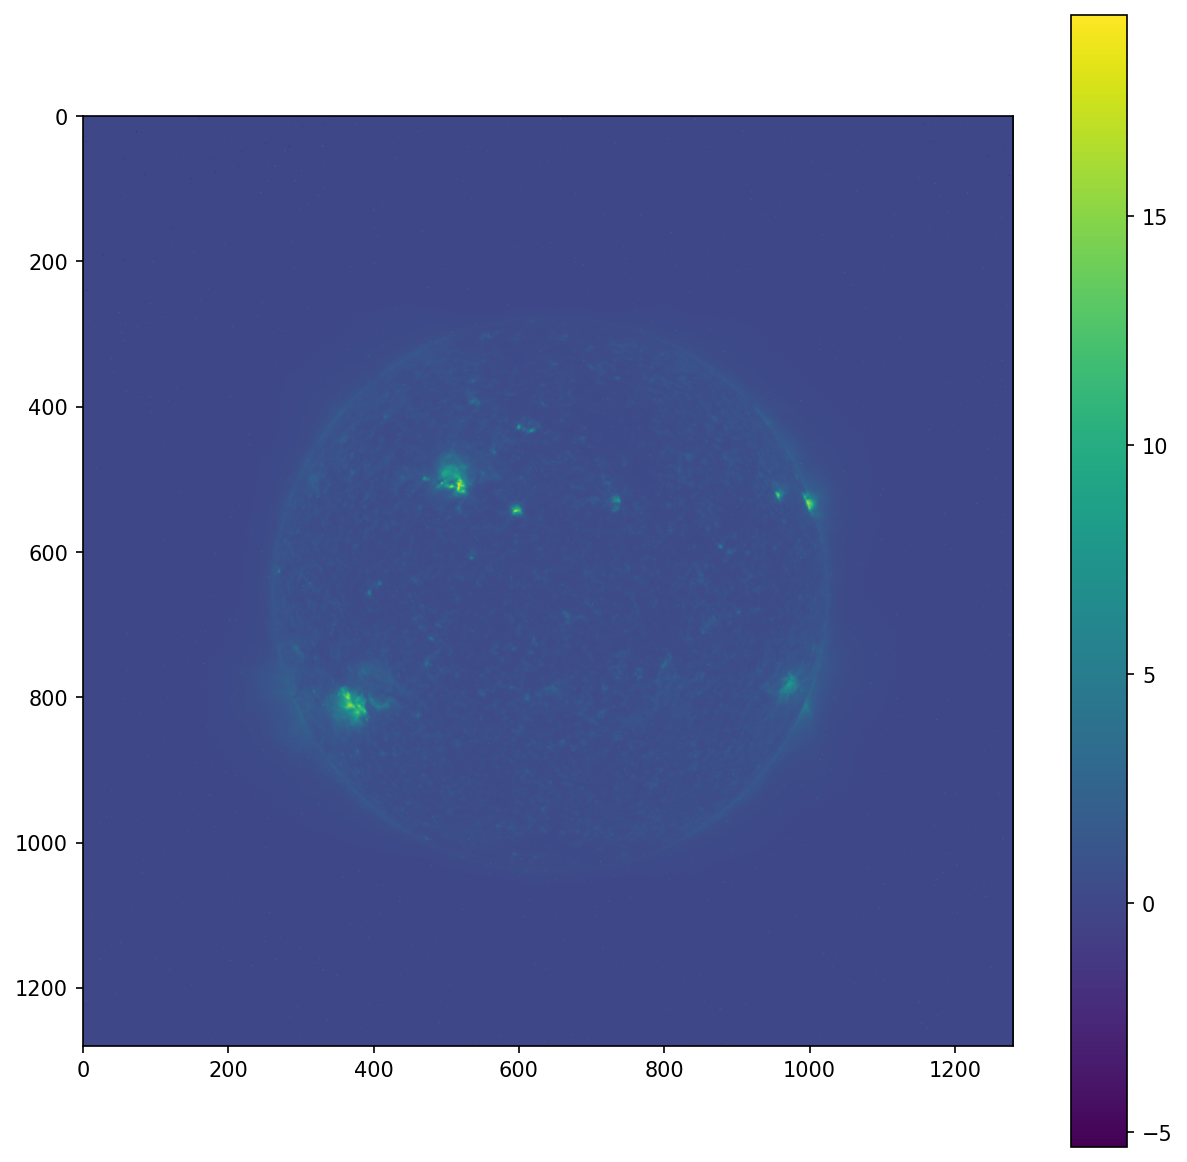

In [50]:
plt.figure(figsize=(10,10),dpi=150)
plt.imshow(data)
plt.colorbar()

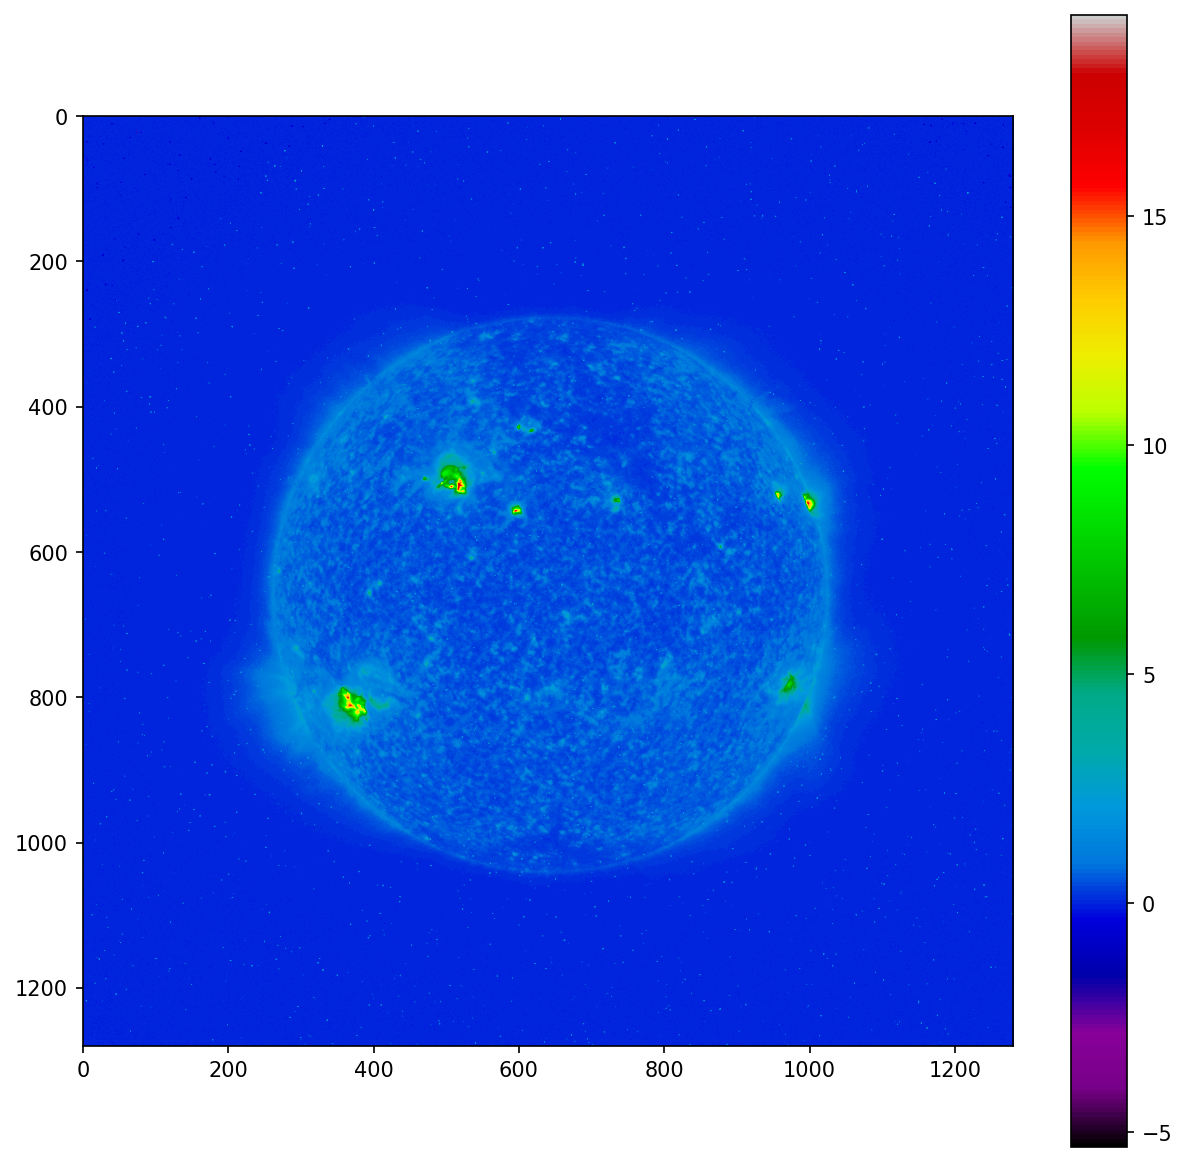

In [58]:
plt.figure(figsize=(10,10),dpi=150)
plt.imshow(data,cmap='nipy_spectral')
plt.colorbar()

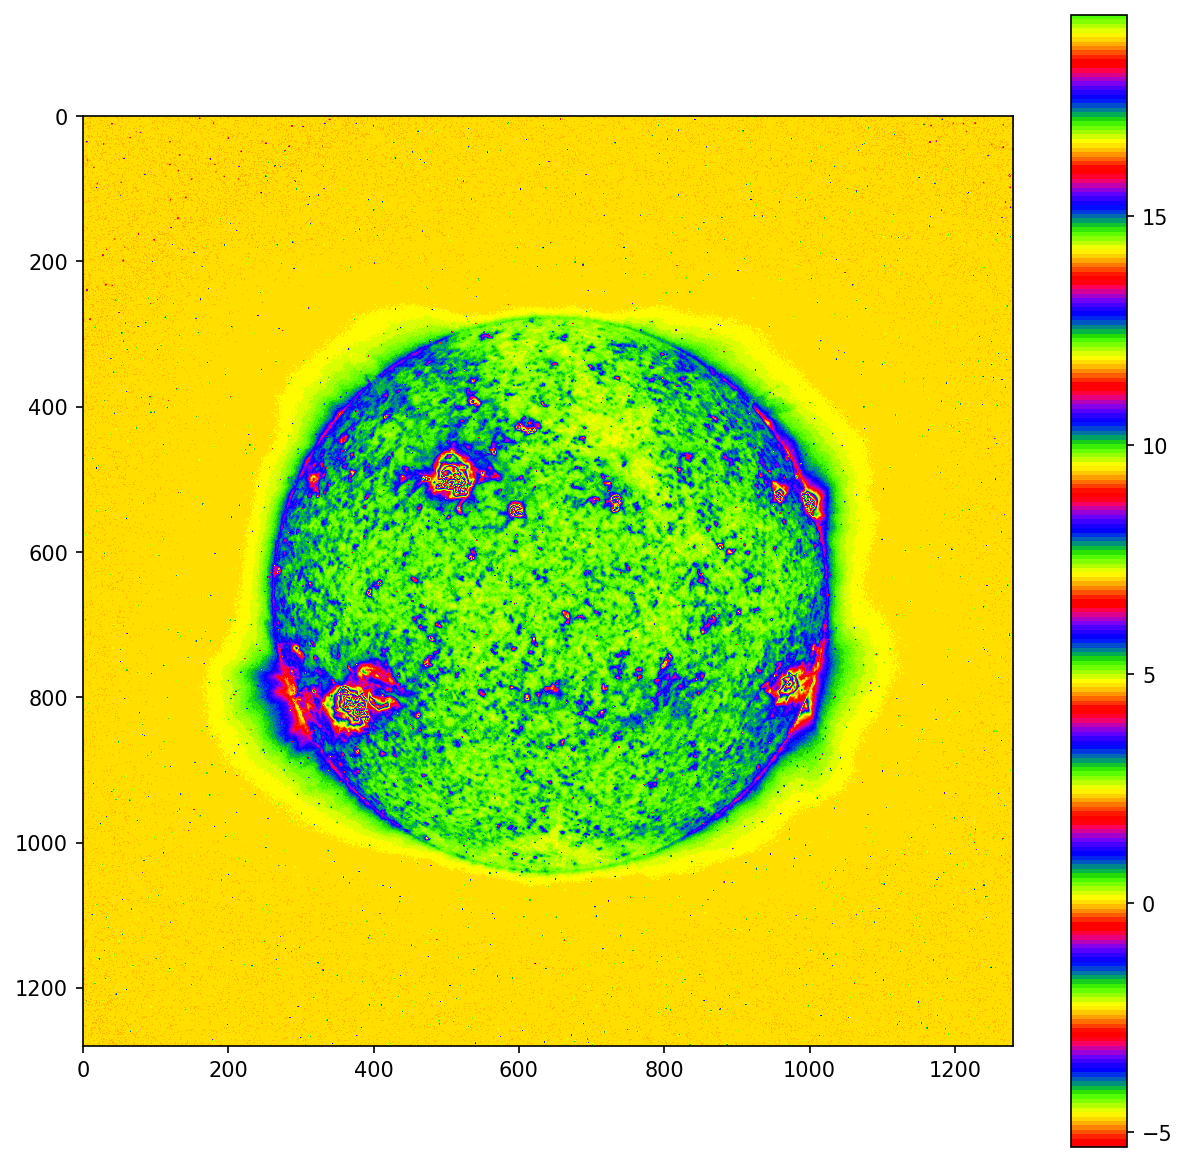

In [59]:
plt.figure(figsize=(10,10),dpi=150)
plt.imshow(data,cmap='prism')
plt.colorbar()